<a href="https://colab.research.google.com/github/shashwat-D/ABSA-based-keyword-extraction/blob/main/motorcycleApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# read specific columns of csv file
df = pd.read_excel("/content/drive/My Drive/Cardo_Play_reviews/20-24_appsCombined.xlsx", usecols = ['review_translated','rating'])
print(df)

       rating                                  review_translated
0           5  ViewRanger is absolutely the best outdoor navi...
1           3  I stumbled across this app recently when looki...
2           5  Iâ€™ve been trying this app out in order to tr...
3           5  I like easy to use apps which do not require a...
4           1  I assumed that you could get this app and just...
...       ...                                                ...
12428       5                                          Great app
12429       5  Better than google maps for battery saving nav...
12430       4  Good but when I try to get transit routes it d...
12431       5                                     Really helpful
12432       5  So easy and great that it works offline! No mo...

[12433 rows x 2 columns]


In [ ]:
df = df.rename(columns={"review_translated":"content"})
df = df.rename(columns={"rating":"score"})
#Fetch wordcount for each abstract
df['word_count'] = df['content'].apply(lambda x: len(str(x).split(" ")))
df[['content','word_count']].head()

,content,word_count
0,ViewRanger is absolutely the best outdoor navi...,124
1,I stumbled across this app recently when looki...,246
2,Iâ€™ve been trying this app out in order to tr...,127
3,I like easy to use apps which do not require a...,114
4,I assumed that you could get this app and just...,147


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","provider","operator","company","primarily","operates", "app", "apps" "love", "like", "great", "good", "better", "best", "bad", "worst", "awesome", "used", "get", "something", "every", "didnt", "speaking", "since", "total", "open", "time", "despite", "unfortunately", "went", "see", "find", "need", "even", "work", "nice", "well", "really", "would", "road", "still", "could", "make", "made", "go", "want", "use", "issue", "tried", "seem", "keep", "wife", "supposed", "user","happy", "motorcycle", "ba", "tell", "saying", "interesting", "decent", "must", "try", "excellent", "thing", "always", "small", "big", "overall", "let", "awful", "seems", "lot"]
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0, len(df)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(df['content'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    ##Stemming
    def stem_with_porter(words):
      porter = nltk.PorterStemmer()
      new_words = [porter.stem(w) for w in words]
      return new_words
    stem_with_porter(text)

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
    

In [ ]:
#View corpus item
print(df['content'][10])
corpus[10]

I like to use the GPS function and stored music in my watch to go for a run without taking my phone. I am in NYC where there are 2 heavily forested parks with many winding trails that are easy to get lost in. There is a map of one of the parks online to be downloaded to the watch but not the other. I have tried to make my own nap to save to my watch, but it is either not possible or very hard to do. Iâ€™m still trying to figure it out.   If it was easy to do, Iâ€™d give the app 5 stars.


'gps function stored music watch run without taking phone nyc heavily forested park many winding trail easy lost map park online downloaded watch nap save watch either possible hard trying figure easy give star'

In [ ]:
df['corpus']=""
df['corpus']=corpus

df.to_excel('/content/drive/My Drive/Colab_ABSA/20-24_apps_reviews_corpus.xlsx')

In [ ]:
df.head()

,content,score,word_count,corpus
0,I can only imagine they designed a new UI to t...,5,68,imagine designed ui generate ad revenue many s...
1,great one stop shop to get updates and forecas...,5,27,stop shop update forecast local mountain love ...
2,Not very updated on ski resorts conditions lik...,3,27,updated ski resort condition nh staying resort...
3,Same as the comment below. They removed the mo...,1,26,comment removed mountain stats vertical acre e...
4,awesome app! All the snow info you'll ever need.,5,9,snow info ever


In [ ]:
df_p1 = df.loc[df['score'] == 4]
df_p2 = df.loc[df['score'] == 5]
df_p = pd.concat([df_p1, df_p2])

df_n1 = df.loc[df['score'] == 1]
df_n2 = df.loc[df['score'] == 2]
df_n = pd.concat([df_n1, df_n2])

print(df_p)

                                                 content  ...                                             corpus
39     Overall design and functionality is very good....  ...  design functionality biggest flaw post submitt...
82     Quick view of resorts that I select. Would lik...  ...  quick view resort select option customize view...
98     nice app, but use to have more of the track ma...  ...  track map info slooes complete web site perfec...
104    I like the layout a lot and all the informatio...  ...  layout information provides opening date consi...
127    SO much better than the last design!! Was way ...  ...  much last design way invasive wanted many perm...
...                                                  ...  ...                                                ...
11939  Love it!! Shows where I went, even in the back...  ...  love show backcountry track speed prove faster...
11940  Easiest way to track your day on the hill, get...  ...  easiest way track day hill mointa

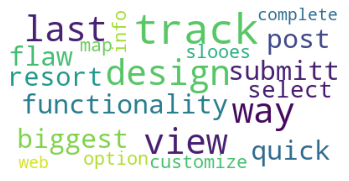

In [ ]:
#Word cloud positive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from google.colab import files
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=20,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(df_p['corpus']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordCloud_positive.png", dpi=900)
# files.download("wordCloud_positive.png")

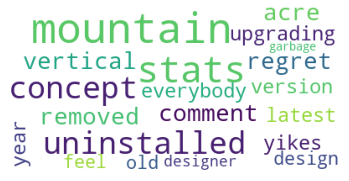

In [ ]:
#Word cloud negative
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=20,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(df_n['corpus']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordCloud_negative.png", dpi=900)
# files.download("wordCloud_negative.png")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:20]

['imagine',
 'designed',
 'ui',
 'generate',
 'ad',
 'revenue',
 'many',
 'said',
 'complete',
 'junk',
 'fix',
 'soon',
 'surely',
 'uninstall',
 'last',
 'design',
 'worked',
 'fine',
 'edit',
 'version']

   n-gram-word  Freq
0          map  1799
1        route   847
2         love   687
3         easy   626
4        track   589
5        phone   528
6         work   526
7         walk   433
8         year   429
9          ski   407
10      useful   405
11         gps   389
12     feature   385
13         day   361
14  viewranger   360
15        free   354
16    accurate   346
17     walking   343
18    tracking   330
19         way   273
20   brilliant   259
21    mountain   258
22        much   252
23      hiking   251
24        apps   245
25        snow   244
26     support   238
27     without   237
28         run   237
29         far   234
30     mapping   228
31    download   223
32     battery   221
33       never   216
34   fantastic   211
35       trail   209
36        able   199
37      skiing   196
38        area   195
39        data   194
40      update   192
41        many   189
42       speed   186
43   recording   184
44  navigation   181
45        know   180
46     offlin

[Text(0, 0, 'map'),
 Text(0, 0, 'route'),
 Text(0, 0, 'love'),
 Text(0, 0, 'easy'),
 Text(0, 0, 'track'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'work'),
 Text(0, 0, 'walk'),
 Text(0, 0, 'year'),
 Text(0, 0, 'ski'),
 Text(0, 0, 'useful'),
 Text(0, 0, 'gps'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'day'),
 Text(0, 0, 'viewranger'),
 Text(0, 0, 'free'),
 Text(0, 0, 'accurate'),
 Text(0, 0, 'walking'),
 Text(0, 0, 'tracking'),
 Text(0, 0, 'way'),
 Text(0, 0, 'brilliant'),
 Text(0, 0, 'mountain'),
 Text(0, 0, 'much'),
 Text(0, 0, 'hiking'),
 Text(0, 0, 'apps'),
 Text(0, 0, 'snow'),
 Text(0, 0, 'support'),
 Text(0, 0, 'without'),
 Text(0, 0, 'run'),
 Text(0, 0, 'far'),
 Text(0, 0, 'mapping'),
 Text(0, 0, 'download'),
 Text(0, 0, 'battery'),
 Text(0, 0, 'never'),
 Text(0, 0, 'fantastic'),
 Text(0, 0, 'trail'),
 Text(0, 0, 'able'),
 Text(0, 0, 'skiing'),
 Text(0, 0, 'area'),
 Text(0, 0, 'data'),
 Text(0, 0, 'update'),
 Text(0, 0, 'many'),
 Text(0, 0, 'speed'),
 Text(0, 0, 'recording'),
 Text(0, 0, 'n

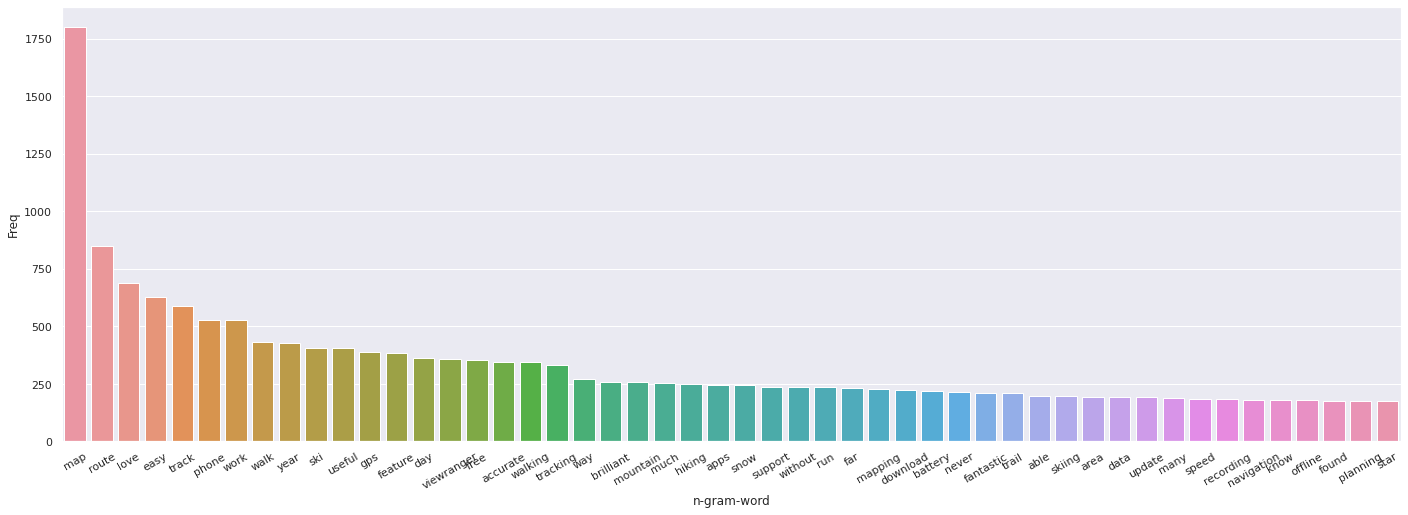

In [ ]:
#Most frequently occuring positive words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words_p = get_top_n_words(df_p['corpus'], n=50)
top_df_p = pd.DataFrame(top_words_p)
top_df_p.columns=["n-gram-word", "Freq"]
print(top_df_p)
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
g = sns.barplot(x="n-gram-word", y="Freq", data=top_df_p)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

    n-gram-word  Freq
0           map   580
1          lift   367
2           day   366
3        update   325
4         phone   309
5           run   299
6          year   295
7       version   277
8         crash   260
9           old   244
10        track   244
11       resort   239
12      android   232
13         back   232
14      feature   221
15      useless   213
16        stats   202
17          ski   196
18         much   183
19          way   181
20         data   180
21         work   155
22          say   154
23     mountain   149
24         many   149
25       record   145
26     terrible   144
27          fix   140
28         last   137
29          gps   136
30         time   133
31      account   130
32         keep   130
33          pay   129
34         vail   128
35         snow   128
36        never   128
37     tracking   124
38       please   123
39        trail   120
40        start   118
41      without   116
42       screen   116
43          log   115
44        

[Text(0, 0, 'map'),
 Text(0, 0, 'lift'),
 Text(0, 0, 'day'),
 Text(0, 0, 'update'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'run'),
 Text(0, 0, 'year'),
 Text(0, 0, 'version'),
 Text(0, 0, 'crash'),
 Text(0, 0, 'old'),
 Text(0, 0, 'track'),
 Text(0, 0, 'resort'),
 Text(0, 0, 'android'),
 Text(0, 0, 'back'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'useless'),
 Text(0, 0, 'stats'),
 Text(0, 0, 'ski'),
 Text(0, 0, 'much'),
 Text(0, 0, 'way'),
 Text(0, 0, 'data'),
 Text(0, 0, 'work'),
 Text(0, 0, 'say'),
 Text(0, 0, 'mountain'),
 Text(0, 0, 'many'),
 Text(0, 0, 'record'),
 Text(0, 0, 'terrible'),
 Text(0, 0, 'fix'),
 Text(0, 0, 'last'),
 Text(0, 0, 'gps'),
 Text(0, 0, 'time'),
 Text(0, 0, 'account'),
 Text(0, 0, 'keep'),
 Text(0, 0, 'pay'),
 Text(0, 0, 'vail'),
 Text(0, 0, 'snow'),
 Text(0, 0, 'never'),
 Text(0, 0, 'tracking'),
 Text(0, 0, 'please'),
 Text(0, 0, 'trail'),
 Text(0, 0, 'start'),
 Text(0, 0, 'without'),
 Text(0, 0, 'screen'),
 Text(0, 0, 'log'),
 Text(0, 0, 'give'),
 Text(0, 0, 'star')

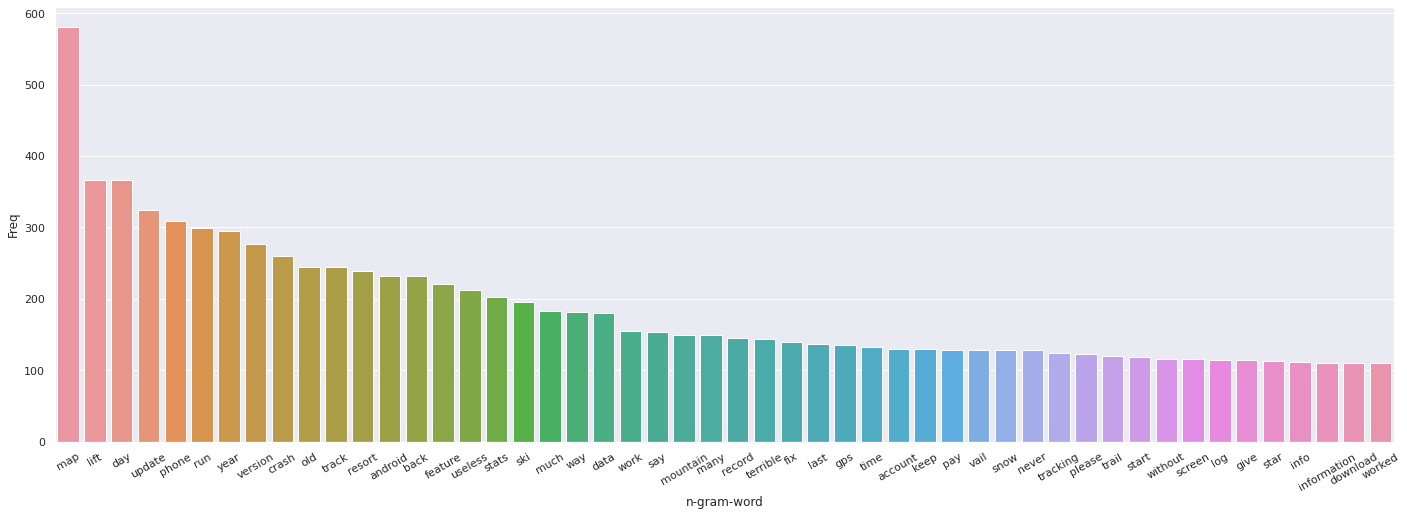

In [ ]:
#Most frequently occuring negative words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words_n = get_top_n_words(df_n['corpus'], n=50)
top_df_n = pd.DataFrame(top_words_n)
top_df_n.columns=["n-gram-word", "Freq"]
print(top_df_n)
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
g = sns.barplot(x="n-gram-word", y="Freq", data=top_df_n)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

           n-gram-word  Freq
0             free map    78
1         download map    66
2     highly recommend    57
3            paper map    57
4             map tile    55
5          view ranger    52
6   highly recommended    50
7           plan route    47
8          offline map    45
9          map compass    45
10          survey map    44
11    customer service    42
12      route planning    41
13     ordnance survey    40
14     walking cycling    38
15          ski resort    38
16     mountain biking    37
17        create route    36
18         map offline    36
19         premium map    35
20         track route    35
21        battery life    35
22      outdoor active    33
23             buy map    33
24        follow route    32
25             ski day    32
26          never lost    31
27    customer support    31
28           max speed    31
29            gpx file    30
30     viewranger year    30
31           give star    29
32        several year    29
33         ski

[Text(0, 0, 'free map'),
 Text(0, 0, 'download map'),
 Text(0, 0, 'highly recommend'),
 Text(0, 0, 'paper map'),
 Text(0, 0, 'map tile'),
 Text(0, 0, 'view ranger'),
 Text(0, 0, 'highly recommended'),
 Text(0, 0, 'plan route'),
 Text(0, 0, 'offline map'),
 Text(0, 0, 'map compass'),
 Text(0, 0, 'survey map'),
 Text(0, 0, 'customer service'),
 Text(0, 0, 'route planning'),
 Text(0, 0, 'ordnance survey'),
 Text(0, 0, 'walking cycling'),
 Text(0, 0, 'ski resort'),
 Text(0, 0, 'mountain biking'),
 Text(0, 0, 'create route'),
 Text(0, 0, 'map offline'),
 Text(0, 0, 'premium map'),
 Text(0, 0, 'track route'),
 Text(0, 0, 'battery life'),
 Text(0, 0, 'outdoor active'),
 Text(0, 0, 'buy map'),
 Text(0, 0, 'follow route'),
 Text(0, 0, 'ski day'),
 Text(0, 0, 'never lost'),
 Text(0, 0, 'customer support'),
 Text(0, 0, 'max speed'),
 Text(0, 0, 'gpx file'),
 Text(0, 0, 'viewranger year'),
 Text(0, 0, 'give star'),
 Text(0, 0, 'several year'),
 Text(0, 0, 'ski tracker'),
 Text(0, 0, 'snow forecast

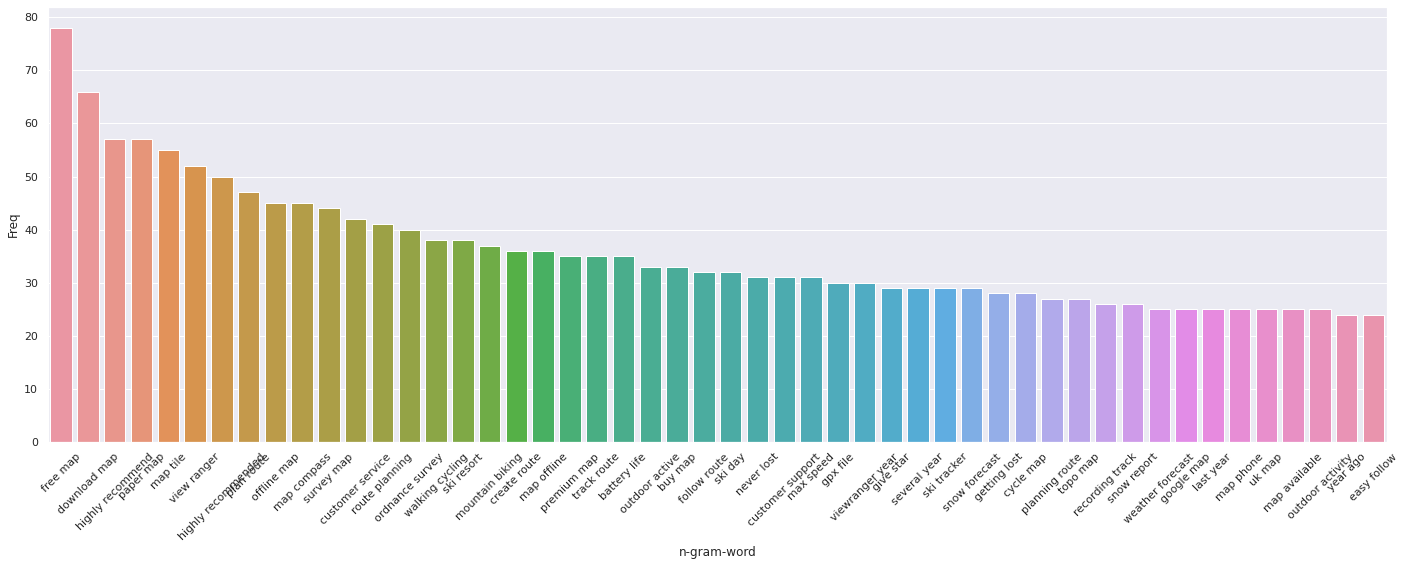

In [ ]:
#Most frequently occuring positive Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words_p = get_top_n2_words(df_p['corpus'], n=50)
top2_df_p = pd.DataFrame(top2_words_p)
top2_df_p.columns=["n-gram-word", "Freq"]
print(top2_df_p)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
h=sns.barplot(x="n-gram-word", y="Freq", data=top2_df_p)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

           n-gram-word  Freq
0            last year    57
1           bring back    56
2          old version    45
3           please fix    44
4   whistler blackcomb    41
5        keep crashing    41
6             back old    36
7          vail resort    36
8     previous version    32
9          snow report    32
10           lift ride    31
11     connect network    29
12        download map    28
13            year ago    26
14       vertical foot    25
15           give star    24
16             ski day    23
17           trail map    22
18            epic mix    22
19      samsung galaxy    22
20      outdoor active    22
21      latest version    21
22       family member    21
23      create account    20
24          ski resort    19
25          google map    19
26           track run    19
27           lift rode    18
28       error message    18
29       latest update    17
30         pretty much    17
31         force close    17
32           ski track    17
33    weather 

[Text(0, 0, 'last year'),
 Text(0, 0, 'bring back'),
 Text(0, 0, 'old version'),
 Text(0, 0, 'please fix'),
 Text(0, 0, 'whistler blackcomb'),
 Text(0, 0, 'keep crashing'),
 Text(0, 0, 'back old'),
 Text(0, 0, 'vail resort'),
 Text(0, 0, 'previous version'),
 Text(0, 0, 'snow report'),
 Text(0, 0, 'lift ride'),
 Text(0, 0, 'connect network'),
 Text(0, 0, 'download map'),
 Text(0, 0, 'year ago'),
 Text(0, 0, 'vertical foot'),
 Text(0, 0, 'give star'),
 Text(0, 0, 'ski day'),
 Text(0, 0, 'trail map'),
 Text(0, 0, 'epic mix'),
 Text(0, 0, 'samsung galaxy'),
 Text(0, 0, 'outdoor active'),
 Text(0, 0, 'latest version'),
 Text(0, 0, 'family member'),
 Text(0, 0, 'create account'),
 Text(0, 0, 'ski resort'),
 Text(0, 0, 'google map'),
 Text(0, 0, 'track run'),
 Text(0, 0, 'lift rode'),
 Text(0, 0, 'error message'),
 Text(0, 0, 'latest update'),
 Text(0, 0, 'pretty much'),
 Text(0, 0, 'force close'),
 Text(0, 0, 'ski track'),
 Text(0, 0, 'weather forecast'),
 Text(0, 0, 'crash constantly'),
 T

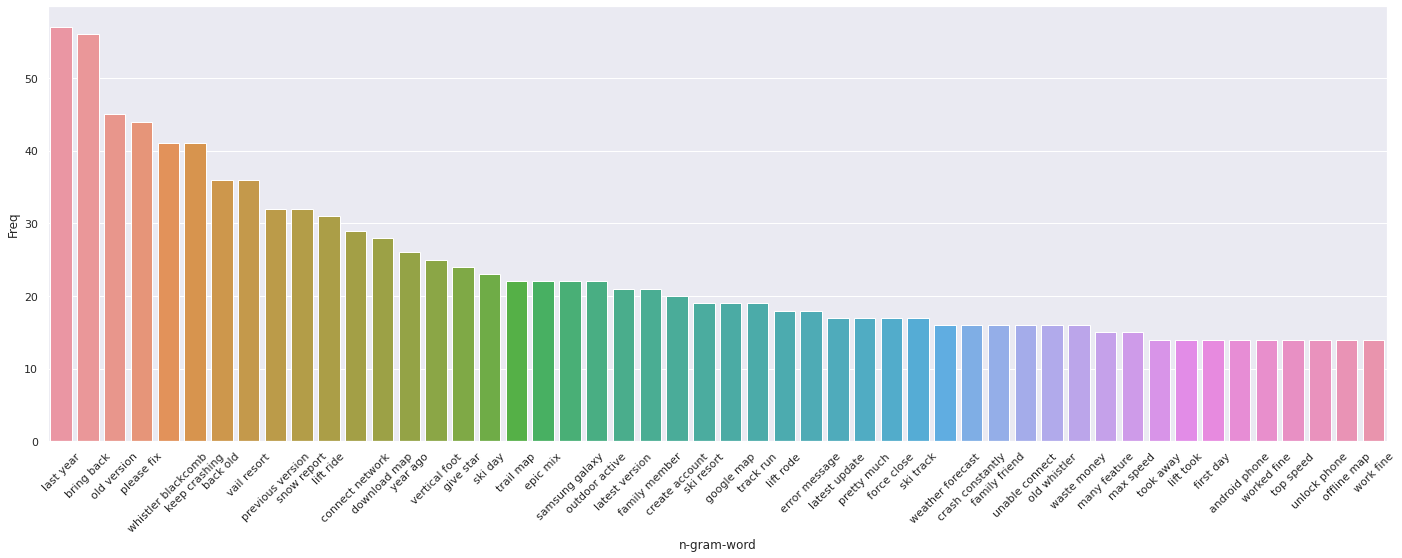

In [ ]:
#Most frequently occuring negative Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words_n = get_top_n2_words(df_n['corpus'], n=50)
top2_df_n = pd.DataFrame(top2_words_n)
top2_df_n.columns=["n-gram-word", "Freq"]
print(top2_df_n)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
h=sns.barplot(x="n-gram-word", y="Freq", data=top2_df_n)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                 n-gram-word  Freq
0        ordnance survey map    27
1       ordinance survey map    16
2          download map tile    11
3          paper map compass    11
4               buy map tile    10
5       ability download map     9
6        support second none     9
7       download map offline     8
8          easy follow route     7
9             walk bike ride     7
10         easy download map     7
11        leave home without     7
12         easy create route     6
13      mountain rescue team     6
14         ski tracking apps     6
15         route easy follow     6
16           easy plan route     6
17             pc sync phone     5
18      buddy beacon feature     5
19         download map area     5
20        saved getting lost     5
21            map plan route     5
22        android wear watch     5
23         download free map     5
24          high quality map     5
25    planning tracking walk     5
26          backup paper map     5
27            ajam a

[Text(0, 0, 'ordnance survey map'),
 Text(0, 0, 'ordinance survey map'),
 Text(0, 0, 'download map tile'),
 Text(0, 0, 'paper map compass'),
 Text(0, 0, 'buy map tile'),
 Text(0, 0, 'ability download map'),
 Text(0, 0, 'support second none'),
 Text(0, 0, 'download map offline'),
 Text(0, 0, 'easy follow route'),
 Text(0, 0, 'walk bike ride'),
 Text(0, 0, 'easy download map'),
 Text(0, 0, 'leave home without'),
 Text(0, 0, 'easy create route'),
 Text(0, 0, 'mountain rescue team'),
 Text(0, 0, 'ski tracking apps'),
 Text(0, 0, 'route easy follow'),
 Text(0, 0, 'easy plan route'),
 Text(0, 0, 'pc sync phone'),
 Text(0, 0, 'buddy beacon feature'),
 Text(0, 0, 'download map area'),
 Text(0, 0, 'saved getting lost'),
 Text(0, 0, 'map plan route'),
 Text(0, 0, 'android wear watch'),
 Text(0, 0, 'download free map'),
 Text(0, 0, 'high quality map'),
 Text(0, 0, 'planning tracking walk'),
 Text(0, 0, 'backup paper map'),
 Text(0, 0, 'ajam ajam ajam'),
 Text(0, 0, 'weather snow condition'),
 Tex

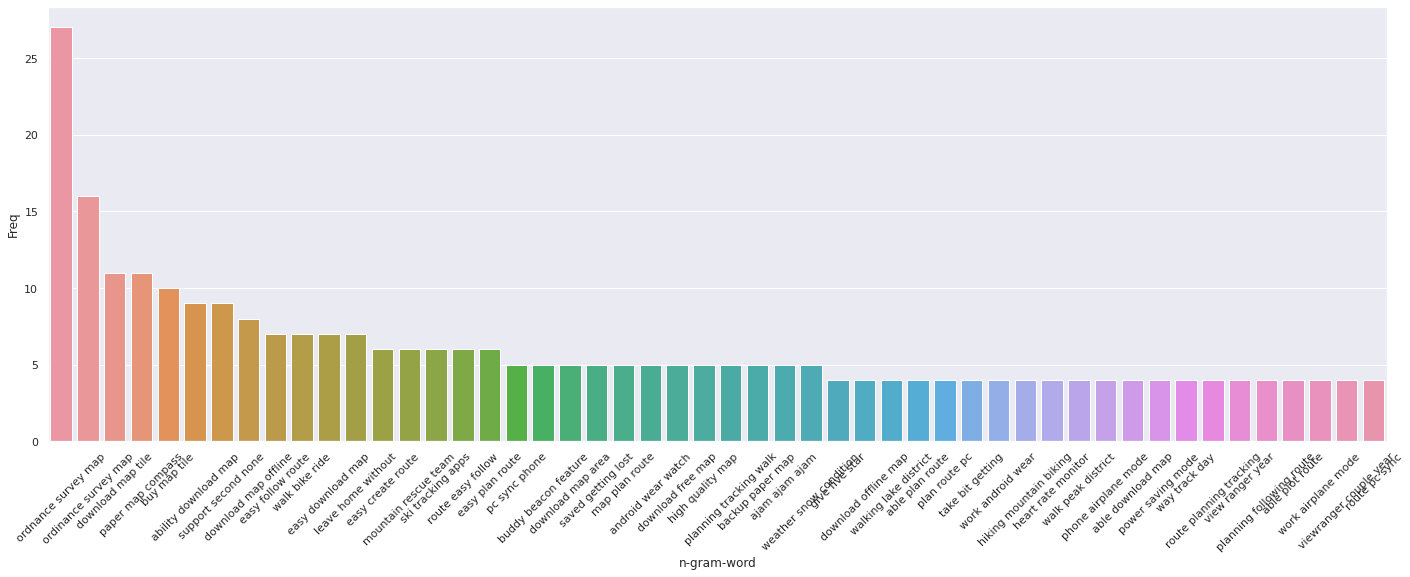

In [ ]:
#Most frequently occuring positive Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words_p = get_top_n3_words(df_p['corpus'], n=50)
top3_df_p = pd.DataFrame(top3_words_p)
top3_df_p.columns=["n-gram-word", "Freq"]
print(top3_df_p)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
j=sns.barplot(x="n-gram-word", y="Freq", data=top3_df_p)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

                    n-gram-word  Freq
0                bring back old    27
1        unable connect network    15
2        old whistler blackcomb    11
3              back old version     9
4                lift wait time     9
5           pretty much useless     8
6             please bring back     7
7              old version much     7
8                record ski day     6
9           weather snow report     5
10          track family member     5
11               give zero star     5
12           say unable connect     5
13              add missed lift     4
14             say need updated     4
15        update latest version     4
16        interactive trail map     4
17          longer track family     4
18             enter date birth     4
19               much le useful     4
20            last year version     4
21                bring back wb     4
22            ski tracking apps     4
23        getting error message     4
24             last year worked     4
25       out

[Text(0, 0, 'bring back old'),
 Text(0, 0, 'unable connect network'),
 Text(0, 0, 'old whistler blackcomb'),
 Text(0, 0, 'back old version'),
 Text(0, 0, 'lift wait time'),
 Text(0, 0, 'pretty much useless'),
 Text(0, 0, 'please bring back'),
 Text(0, 0, 'old version much'),
 Text(0, 0, 'record ski day'),
 Text(0, 0, 'weather snow report'),
 Text(0, 0, 'track family member'),
 Text(0, 0, 'give zero star'),
 Text(0, 0, 'say unable connect'),
 Text(0, 0, 'add missed lift'),
 Text(0, 0, 'say need updated'),
 Text(0, 0, 'update latest version'),
 Text(0, 0, 'interactive trail map'),
 Text(0, 0, 'longer track family'),
 Text(0, 0, 'enter date birth'),
 Text(0, 0, 'much le useful'),
 Text(0, 0, 'last year version'),
 Text(0, 0, 'bring back wb'),
 Text(0, 0, 'ski tracking apps'),
 Text(0, 0, 'getting error message'),
 Text(0, 0, 'last year worked'),
 Text(0, 0, 'outdoor active rubbish'),
 Text(0, 0, 'android please fix'),
 Text(0, 0, 'bring old back'),
 Text(0, 0, 'take long load'),
 Text(0, 

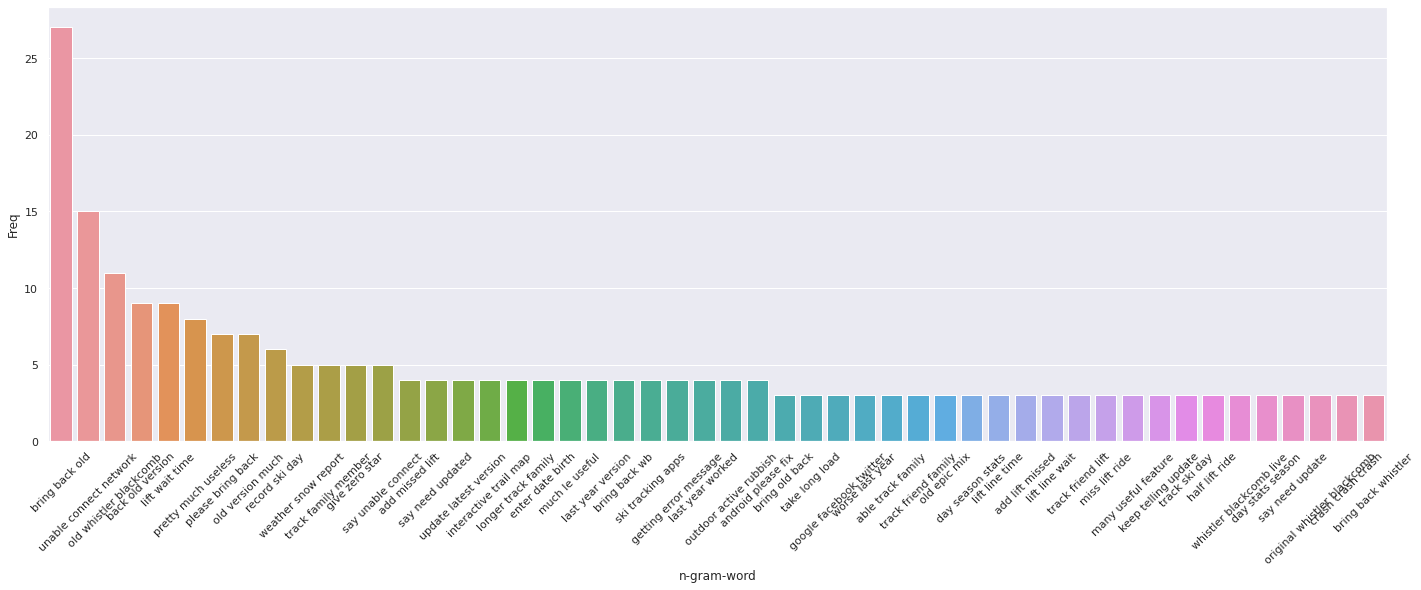

In [ ]:
#Most frequently occuring negative Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words_n = get_top_n3_words(df_n['corpus'], n=50)
top3_df_n = pd.DataFrame(top3_words_n)
top3_df_n.columns=["n-gram-word", "Freq"]
print(top3_df_n)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
j=sns.barplot(x="n-gram-word", y="Freq", data=top3_df_n)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [ ]:
top_df_p['sentiment'] = 'positive'
top2_df_p['sentiment'] = 'positive'
top3_df_p['sentiment'] = 'positive'

top_df_n['sentiment'] = 'negative'
top2_df_n['sentiment'] = 'negative'
top3_df_n['sentiment'] = 'negative'

top_df_p['n-gram'] = 'Uni'
top_df_n['n-gram'] = 'Uni'

top2_df_p['n-gram'] = 'Bi'
top2_df_n['n-gram'] = 'Bi'

top3_df_p['n-gram'] = 'Tri'
top3_df_n['n-gram'] = 'Tri'

df_combi = pd.concat([top_df_p, top_df_n, top2_df_p, top2_df_n, top3_df_p, top3_df_n])
print(df_combi)

                    n-gram-word  Freq sentiment n-gram
0                           map  1799  positive    Uni
1                         route   847  positive    Uni
2                          love   687  positive    Uni
3                          easy   626  positive    Uni
4                         track   589  positive    Uni
..                          ...   ...       ...    ...
45             day stats season     3  negative    Tri
46              say need update     3  negative    Tri
47  original whistler blackcomb     3  negative    Tri
48            crash crash crash     3  negative    Tri
49          bring back whistler     3  negative    Tri

[300 rows x 4 columns]


In [ ]:
df_combi.to_excel('/content/drive/My Drive/Colab_ABSA/skiiApps_keywords.xlsx')